In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [2]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor='black'
        )
        
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test= X[test_idx, :]
        y_test = y[test_idx]
        plt.scatter(
            X_test[:, 0], 
            X_test[:, 1],
            c=[],
            edgecolor='black',
            alpha=1,
            linewidth=1, 
            marker='o',
            s=100, 
            label='test set'
        )

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y:', np.bincount(y_train))
print('Labels counts in y:', np.bincount(y_test))
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Labels counts in y: [35 35 35]
Labels counts in y: [15 15 15]


Accuracy: 0.978
Probabilities: 
 [[3.81527885e-09 1.44792866e-01 8.55207131e-01]
 [8.34020679e-01 1.65979321e-01 3.25737138e-13]
 [8.48831425e-01 1.51168575e-01 2.62277619e-14]]
Class with max probability: 
 [2 0 0]
Class with predict method: 
 [2 0 0]


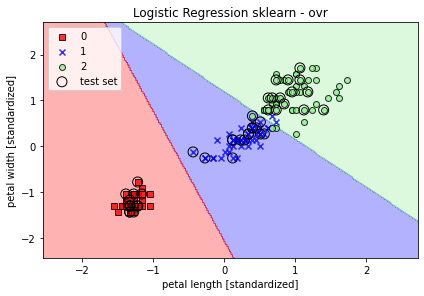

In [4]:
lr_ovr = LogisticRegression(C=100, random_state=1, solver='lbfgs', multi_class='ovr')
lr_ovr.fit(X_train_std, y_train)
print('Accuracy: %.3f' % lr_ovr.score(X_test_std, y_test))
print('Probabilities: \n', lr_ovr.predict_proba(X_test_std[:3, :]))
print('Class with max probability: \n', lr_ovr.predict_proba(X_test_std[:3, :]).argmax(axis=1))
print('Class with predict method: \n', lr_ovr.predict(X_test_std[:3, :]))
plot_decision_regions(X_combined_std, y_combined, classifier=lr_ovr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('Logistic Regression sklearn - ovr')
plt.show()

Accuracy: 0.978
Probabilities: 
 [[1.52213484e-12 3.85303417e-04 9.99614697e-01]
 [9.93560717e-01 6.43928295e-03 1.14112016e-15]
 [9.98655228e-01 1.34477208e-03 1.76178271e-17]]
Class with max probability: 
 [2 0 0]
Class with predict method: 
 [2 0 0]


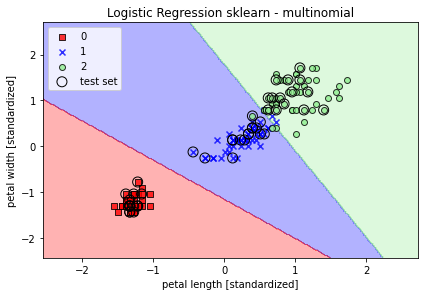

In [5]:
lr_multinomial = LogisticRegression(C=100, random_state=1, solver='lbfgs', multi_class='multinomial')
lr_multinomial.fit(X_train_std, y_train)
print('Accuracy: %.3f' % lr_multinomial.score(X_test_std, y_test))
print('Probabilities: \n', lr_multinomial.predict_proba(X_test_std[:3, :]))
print('Class with max probability: \n', lr_multinomial.predict_proba(X_test_std[:3, :]).argmax(axis=1))
print('Class with predict method: \n', lr_multinomial.predict(X_test_std[:3, :]))
plot_decision_regions(X_combined_std, y_combined, classifier=lr_multinomial, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('Logistic Regression sklearn - multinomial')
plt.show()

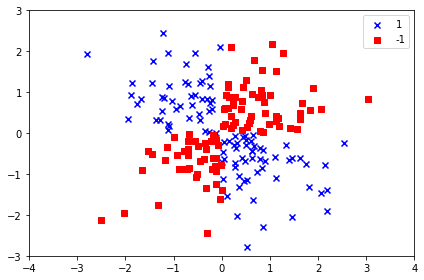

In [6]:
# create random XOR dataset
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label=1)
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label=-1)
plt.xlim([-4, 4])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

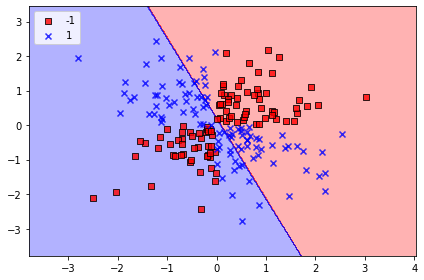

In [7]:
lr = LogisticRegression(C=1, random_state=1, solver='lbfgs', multi_class='multinomial')
lr.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=lr)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

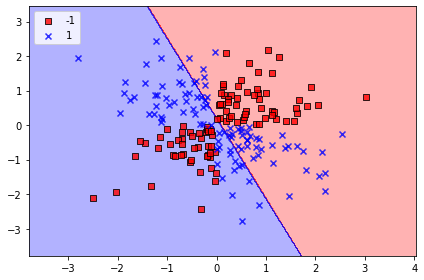

In [8]:
lr = LogisticRegression(C=100, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=lr)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

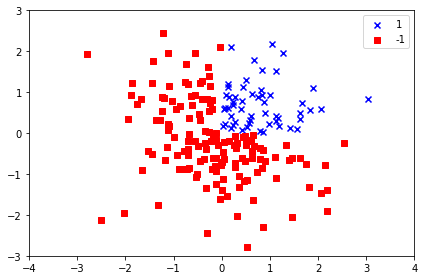

In [9]:
# create random AND dataset
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_and(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label=1)
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label=-1)
plt.xlim([-4, 4])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

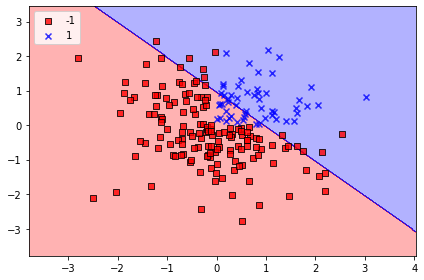

In [10]:
lr = LogisticRegression(C=100, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=lr)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()